In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 8000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
cnn.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [11]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=20, callbacks=[early_stopping])

Epoch 1/20
250/250 [==============================] - 39s 155ms/step - loss: 0.6777 - accuracy: 0.5620 - val_loss: 0.6713 - val_accuracy: 0.5585
Epoch 2/20
250/250 [==============================] - 39s 157ms/step - loss: 0.6437 - accuracy: 0.6269 - val_loss: 0.6012 - val_accuracy: 0.6925
Epoch 3/20
250/250 [==============================] - 42s 169ms/step - loss: 0.6174 - accuracy: 0.6590 - val_loss: 0.5962 - val_accuracy: 0.6625
Epoch 4/20
250/250 [==============================] - 41s 164ms/step - loss: 0.6043 - accuracy: 0.6660 - val_loss: 0.5849 - val_accuracy: 0.6930
Epoch 5/20
250/250 [==============================] - 41s 166ms/step - loss: 0.5855 - accuracy: 0.6806 - val_loss: 0.5954 - val_accuracy: 0.6745
Epoch 6/20
250/250 [==============================] - 42s 168ms/step - loss: 0.5800 - accuracy: 0.6935 - val_loss: 0.5384 - val_accuracy: 0.7320
Epoch 7/20
250/250 [==============================] - 42s 168ms/step - loss: 0.5693 - accuracy: 0.7053 - val_loss: 0.5580 - val_ac

In [12]:
cnn.evaluate(test_set)

63/63 [==============================] - 5s 77ms/step - loss: 0.4548 - accuracy: 0.7950


[0.454843670129776, 0.7950000166893005]

In [13]:
test_image = image.load_img('dataset/test_set/dogs/dog.4115.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(result)

[[1.]]


Text(0.5, 1.0, 'Training and validation loss')

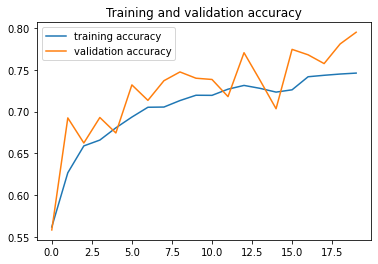

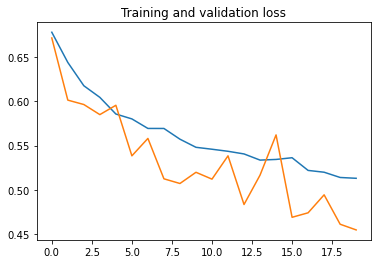

In [15]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')